In [11]:
from sklearn import datasets

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import math

In [66]:
import pandas as pd

# -----------

## 0. Data

In [15]:
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 

In [38]:
X0

array([[2.37319011, 1.71875981],
       [1.51261889, 1.40558943],
       [2.4696794 , 2.02144973],
       [1.78736889, 1.29380961],
       [1.81231157, 1.56119497],
       [2.03717355, 1.93397133],
       [1.53790057, 1.87434722],
       [2.29312867, 2.76537389],
       [1.38805594, 1.86419379],
       [1.57279694, 0.90707347],
       [1.42746579, 0.71254431],
       [2.24760864, 2.39846497],
       [1.33595491, 1.61731637],
       [1.69420104, 1.94273986],
       [2.53897645, 2.54957308],
       [1.3071994 , 0.19362396],
       [2.13924705, 2.09561534],
       [2.47383468, 2.41269466],
       [2.00512009, 1.89290099],
       [2.28205624, 1.79675607]])

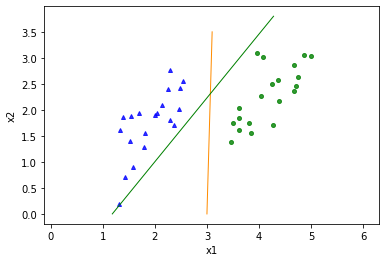

In [65]:
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
plt.plot([3, 3.1], [0, 3.5], lw=1, color="darkorange")
plt.plot([1.18070687, 4.28018474], [0, 3.8], lw=1, color="green")
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot()
plt.show()

## 1. Perceptron Learning Algorithm

In [31]:
X = np.concatenate((X0.T, X1.T), axis=1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [46]:
def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    n_iteration = 0
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
            n_iteration = n_iteration + 1
                
        if has_converged(X, y, w[-1]) or n_iteration > 100:
            print("Converged at {} iteration".format(n_iteration))
            break
    return (w, mis_points)

In [47]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)

Converged at 80 iteration


In [54]:
print(w[-1])

[[ 6.73773762]
 [-5.70652867]
 [ 4.65454192]]


In [63]:
# draw w0 + w1x1 + w2x2 = 0
w0 = w[-1][0]
w1 = w[-1][1]
w2 = w[-1][2]
x2 = np.array([0, 3.8])
x1 = (-w0 - w2*x2)/w1
print(x1)

[1.18070687 4.28018474]


In [60]:
x = np.array([1., 3., 2.23])
print(w[-1].T.dot(x))

[-0.00221991]


In [41]:
print(x1)

[3.  3.1]


## 2. Logistic Regression

In [8]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [9]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


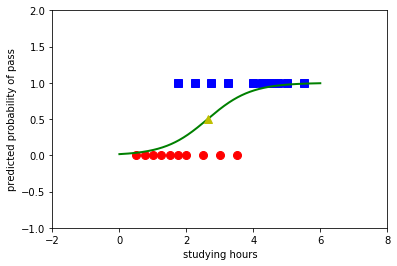

In [10]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

### Breast Cancer

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (0 for benign, 1 for malignant)

In [67]:
breastPath = "./data/breast_cancer.csv"
pdBreast = pd.read_csv(breastPath, delimiter=",")

In [68]:
pdBreast.shape

(569, 32)

In [42]:
pdBreast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
lsCol = pdBreast.columns
ftCol = [c for c in lsCol if c not in ["id", "diagnosis"]]
lbCol = "diagnosis"

In [46]:
data = pdBreast[ftCol].values
label = (pdBreast[lbCol]=='M').values

In [50]:
# Area Mean vs Label
tumorSize = pdBreast["radius_mean"].values

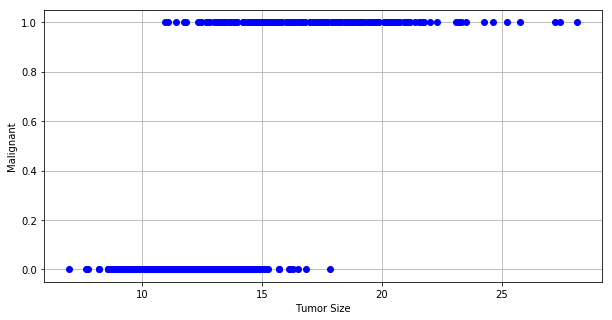

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(tumorSize, label, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.grid(True)
plt.show()